In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

df = pd.read_csv('datasets/sms_spam_svm.csv')

y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)



In [3]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


/Users/atheist/Documents/GitHub/AIinCS-WS/W3/defs.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

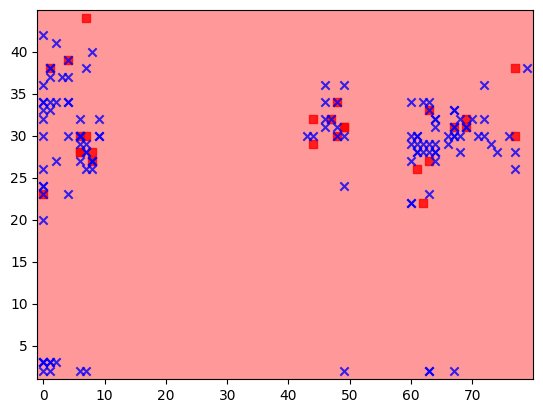

In [5]:
# 'plot_decision_regions' from https://github.com/rasbt/python-machine-learning-book
from defs import plot_decision_regions

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=svm, test_idx=range(-15, 15))
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 7
Accuracy: 0.84
